In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to check my results
from scipy import stats
from sklearn.neighbors import KernelDensity

## Q1 mykde(X, h)

In [2]:
def kernel(dist):
    """
    uniform kernel function
    """
    return int(dist <= .5)

def mykde(x, h, auto=True):
    """
    x - data np.array with shape (n, 2)
    h - bandwidth, int
    auto - bool on how to generate # of bins
    
    return [p(estimated density p(x)), x(domain where p(x) was estimated)]
    """
    
    xmin, xmax = np.min(x), np.max(x)
    diff = xmax - xmin
    
    # print(f'xmin: {xmin}, xmax: {xmax}, diff: {diff}')
    
    # bins
    
    bins = np.linspace(xmin-h, xmax+h, int(diff/h) + 50 if auto else 100)
    
    
    # p(x)
    sums = np.zeros(len(bins))
    
    # print(f'bins.shape: {bins.shape}, sums.shape: {sums.shape}')
    
    # compute density 
    for xi in x:
        # in every bin
        for i, bi in enumerate(bins):
            # compute distance
            dist = abs(bi-xi)/h
            sums[i] += kernel(dist)/h
    
    # print(f'Before norm: {sums}')
    
    # normalize px
    sums /= len(x)
    
    # print(f'Normed: {sums}\nBins: {bins}')
    
    return sums, bins

## Q2 generating data to test mykde

(0, 10)

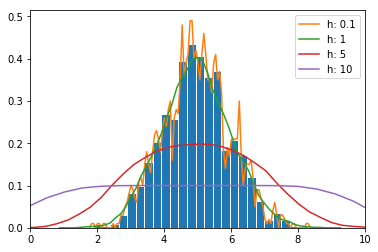

In [3]:
x1 = np.random.normal(5, 1, 1000)

# underlying histogram
_ = plt.hist(x1[:], bins=25, density=True, ec='white')

# for different bandwidth
for h in [.1, 1, 5, 10]:
    px, bins = mykde(x1, h)
    
    plt.plot(bins, px, label=f'h: {h}')

plt.legend()
plt.xlim((0, 10))

## Q3 generate data & test mykde with (mu, sigma) = (5, 1) & (0, 0.2)

(-2, 2)

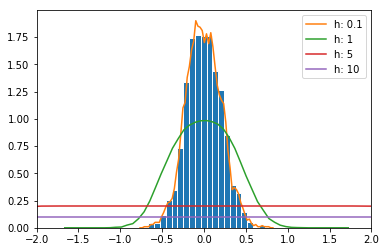

In [4]:
x2 = np.random.normal(0, 0.2, 1000)

# underlying histogram
_ = plt.hist(x2[:], bins=20, density=True, ec='white')

# for different bandwidth
for h in [.1, 1, 5, 10]:
    px, bins = mykde(x2, h)
    
    plt.plot(bins, px, label=f'h: {h}')

plt.legend()
plt.xlim((-2, 2))

## Q4 generate 2d gaussian data & test mykde

In [5]:
# data generation
mu, cov = [1, 0], [[0.9, 0.4], [0.4, 0.9]]
mu2 = [0, 1.5]

dx1, dy1 = np.random.multivariate_normal(mu, cov, 500).T
dx2, dy2 = np.random.multivariate_normal(mu2, cov, 500).T

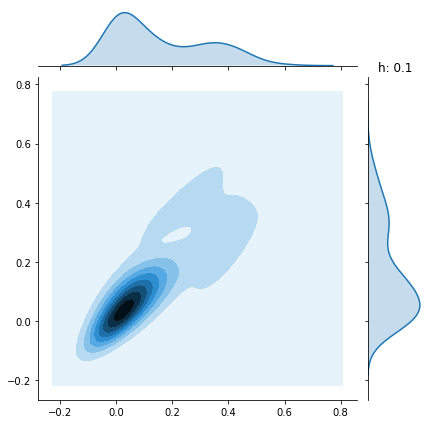

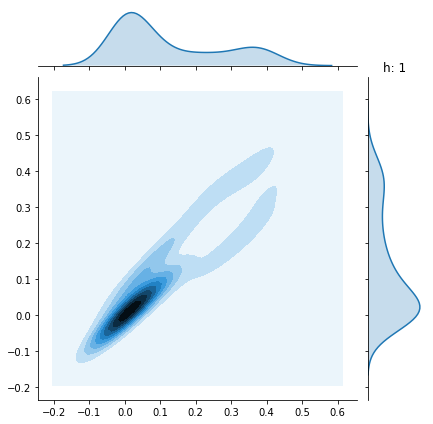

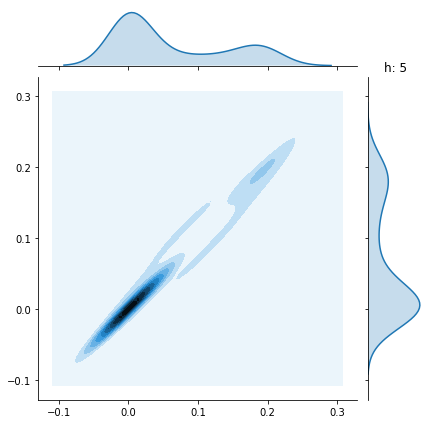

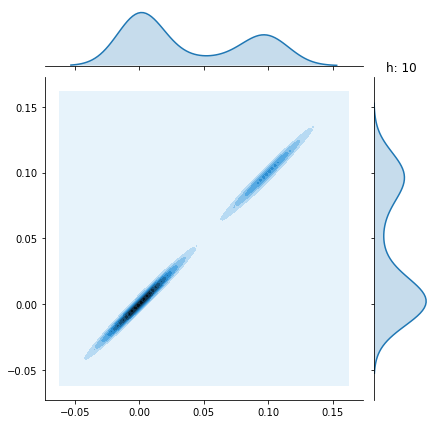

In [6]:
# here i beleive 2d kde is combination of 1d x-axis kde and 1d y-axis kde

for h in [.1, 1, 5, 10]:
    px1, _ = mykde(dx1, h, 0)
    px2, _ = mykde(dy1, h, 0)
    
    sns.jointplot(px1, px2, kind='kde')
    plt.title(f'h: {h}')

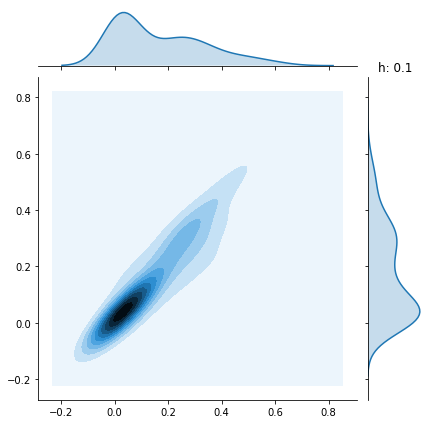

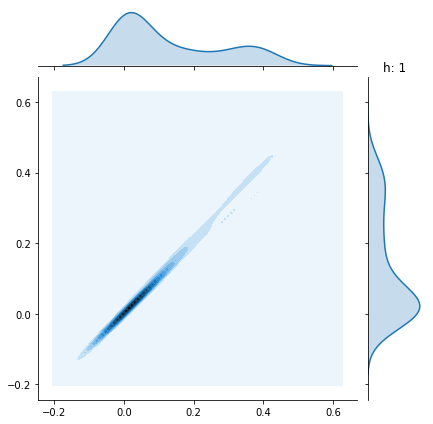

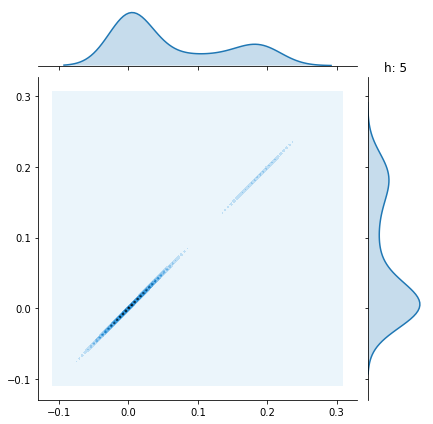

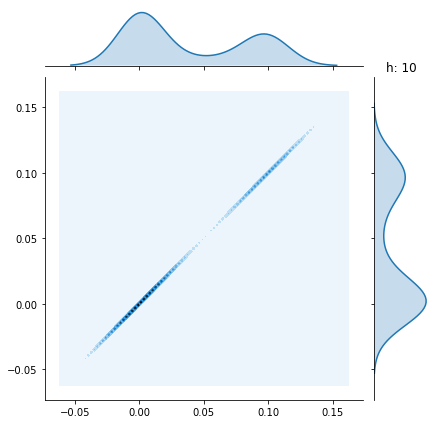

In [7]:
# plots for d_2

for h in [.1, 1, 5, 10]:
    px1, _ = mykde(dx2, h, 0)
    px2, _ = mykde(dy2, h, 0)
    
    sns.jointplot(px1, px2, kind='kde')
    plt.title(f'h: {h}')